In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [48]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000,n_features= 2, centers=3)

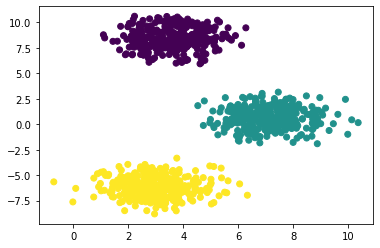

In [49]:
plt.scatter(X[:,0],X[:,1],c=y)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-value using Elbow method

In [56]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(X_train)
    wcss.append(model.inertia_)

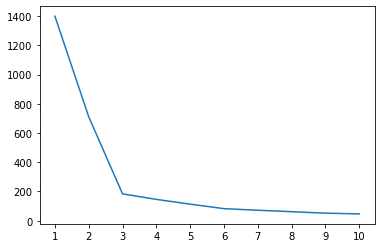

In [57]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.show()

In [58]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X_train)

KMeans(n_clusters=3)

In [59]:
y_pred = model.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9933333333333333

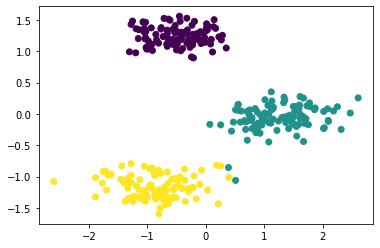

In [61]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

## knee locater

In [67]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve = 'convex', direction='decreasing')

In [68]:
kl.elbow

3

In [69]:
## Slihoutte Score

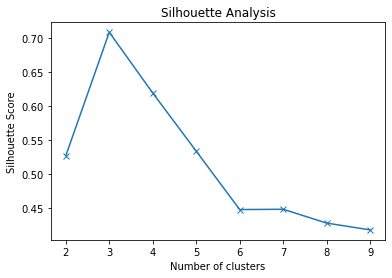

In [74]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 10), silhouette_scores, marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()